In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
X_iris = iris.drop("species" , axis = 1)
y_iris = iris["species"]

In [6]:
X_iris.shape

(150, 4)

In [7]:
y_iris.shape

(150,)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
rng = np.random.RandomState(42)

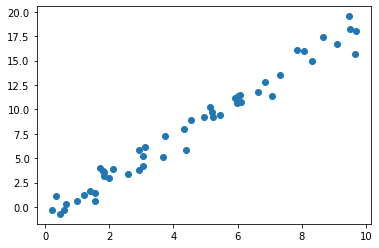

In [10]:
x = 10*rng.rand(50)
y = 2*x-1+rng.randn(50)
plt.scatter(x,y); # We see that there is linear relation between them.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression(fit_intercept=True)
lr

LinearRegression()

In [13]:
X = x[:,np.newaxis] # We created 50 samples with only 1 feature. Because we will do linear regression first.
X.shape 

(50, 1)

In [14]:
lr.fit(X,y)

LinearRegression()

In [15]:
lr.coef_

array([1.9776566])

In [16]:
lr.intercept_

-0.903310725531111

In [17]:
x_fit = np.linspace(-1,11)
X_fit = x_fit[:,np.newaxis] # this is for get only 1 feature rows.
y_fit = lr.predict(X_fit)

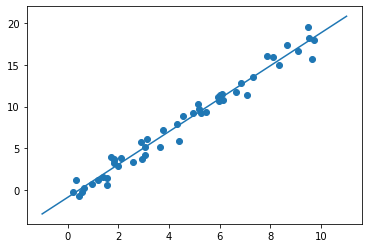

In [18]:
plt.scatter(x,y)
plt.plot(X_fit,y_fit);

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,random_state = 1)

In [21]:
from sklearn.naive_bayes import GaussianNB  # We imported our model class

In [22]:
gauss = GaussianNB()

In [23]:
gauss.fit(X_train,y_train)

GaussianNB()

In [24]:
y_preds = gauss.predict(X_test)
# print(np.mean(y_preds == y_test)) # %97
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds) # This is also working. %97

0.9736842105263158

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
## We'll use unsupervised algorithms. # First we want to reduce dimension.

In [27]:
from sklearn.decomposition import PCA

In [28]:
lr = PCA(n_components=2)

In [29]:
lr.fit(X_iris)

PCA(n_components=2)

In [30]:
X_2D = lr.transform(X_iris) # We transform X_iris to 2 dimensions.

In [31]:
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [33]:
import seaborn as sns

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


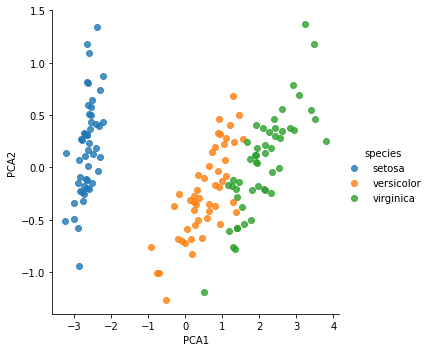

In [34]:
sns.lmplot("PCA1","PCA2", hue="species" , data = iris , fit_reg=False );

In [35]:
from sklearn.mixture import GaussianMixture

In [36]:
gaussMix = GaussianMixture(n_components=3 , covariance_type="full")

In [37]:
gaussMix.fit(X_train)

GaussianMixture(n_components=3)

In [38]:
y_gmm = gaussMix.predict(X_iris)

In [39]:
iris["sets"] = y_gmm

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,sets
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


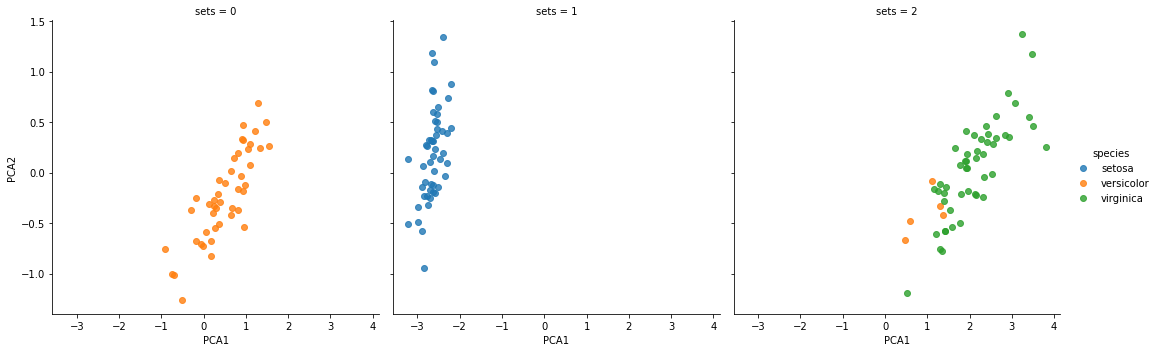

In [41]:
sns.lmplot("PCA1","PCA2", hue="species" ,col = "sets" , data = iris , fit_reg=False );

In [42]:
from sklearn.datasets import load_digits

In [43]:
digits = load_digits()

In [44]:
digits.images.shape

(1797, 8, 8)

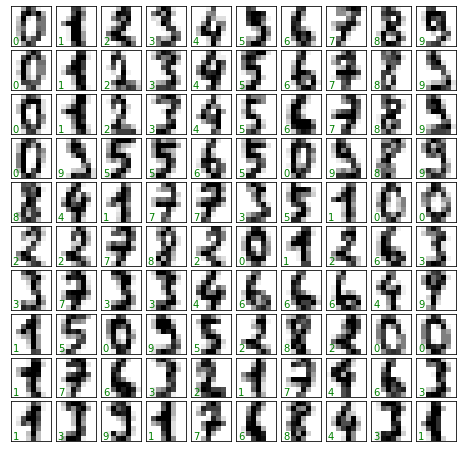

In [50]:
fig, ax = plt.subplots(10,10,figsize = (8,8) , subplot_kw = {'xticks' : [] , 'yticks':[]},
                     gridspec_kw = dict(hspace=0.1,wspace = 0.1))
for i, ax in enumerate(ax.flat):
    ax.imshow(digits.images[i], cmap = 'binary' , interpolation = 'nearest')
    ax.text(0.05,0.05, str(digits.target[i]), transform = ax.transAxes , color = 'green')

In [52]:
X = digits.data
y = digits.target
print(X.shape) # 64 dimension is foo many. We want to reduce it.
print(y.shape)

(1797, 64)
(1797,)


In [53]:
from sklearn.manifold import Isomap

In [54]:
iso = Isomap(n_components=2) # We have determined how many sizes our object will reduce the attributes.

In [55]:
iso.fit(X) # We use it with X datas.

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [56]:
data2 = iso.transform(X)
data2.shape

(1797, 2)

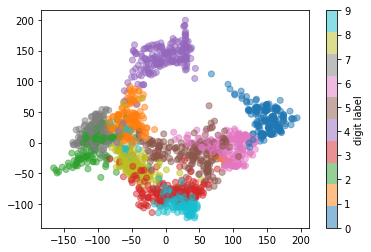

In [57]:
plt.scatter(data2[:,0],data2[:,1] , c= digits.target, alpha = 0.5 , cmap = plt.cm.get_cmap('tab10',10))
plt.colorbar(label= 'digit label' , ticks = range(10))
plt.show() # Looks good. We use simple algorithms for this data.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gaussNB = GaussianNB()

In [62]:
gaussNB.fit(X_train,y_train)

GaussianNB()

In [63]:
y_preds = gaussNB.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test,y_preds) # 0.83 is good. But where is our 0.17 wrongs.

0.8333333333333334

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
mat = confusion_matrix(y_test,y_preds)

Text(240.00000000000017, 0.5, 'True values')

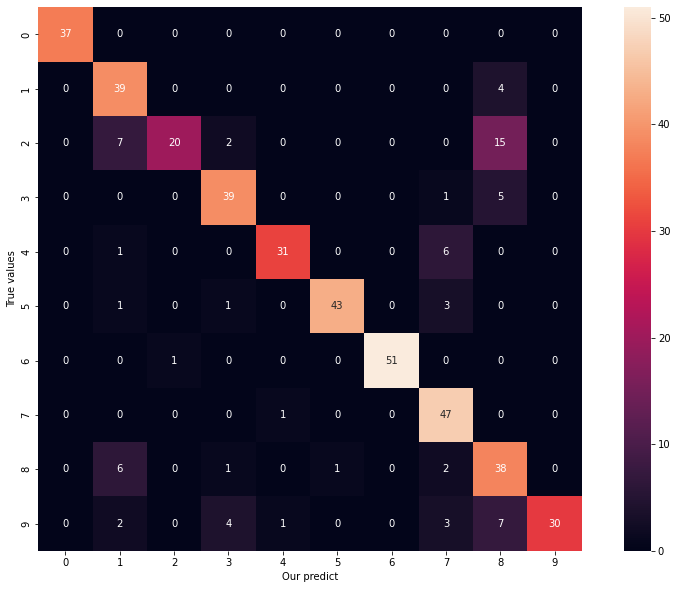

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(mat,square=True,annot=True,cbar=True)
plt.xlabel('Our predict')
plt.ylabel('True values')